<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_Job_Email_Intent_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 300/300 [00:02<00:00, 136.26it/s]



📨 BoW + KNN – Classification Report:
              precision    recall  f1-score   support

      Resume       1.00      1.00      1.00        25
   Interview       1.00      1.00      1.00        25
 Negotiation       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



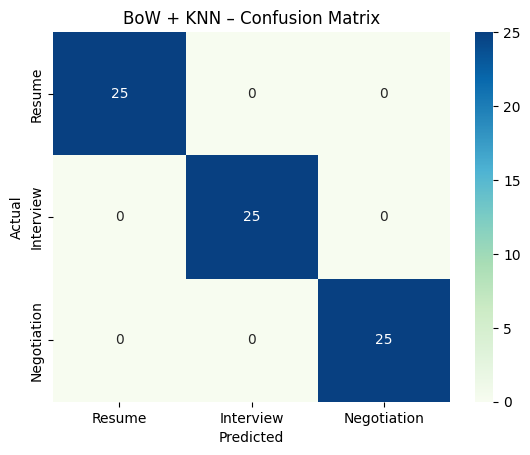


📨 TF-IDF + KNN – Classification Report:
              precision    recall  f1-score   support

      Resume       1.00      1.00      1.00        25
   Interview       1.00      1.00      1.00        25
 Negotiation       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



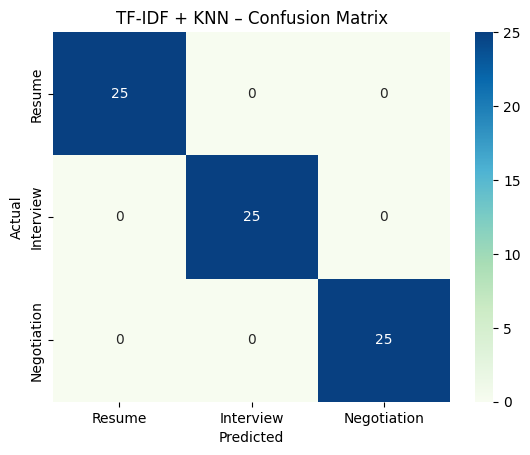


📨 Embeddings + KNN – Classification Report:
              precision    recall  f1-score   support

      Resume       1.00      1.00      1.00        25
   Interview       1.00      1.00      1.00        25
 Negotiation       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



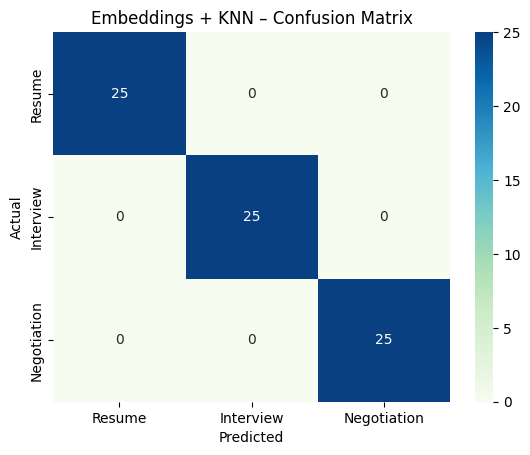

In [5]:
# 🧾 Classify job-related emails using KNN + BoW/TFIDF/Embeddings
import pandas as pd, numpy as np, random, spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Load spaCy model with embeddings
nlp = spacy.load("en_core_web_md")

# 🧹 Custom tokenizer
def spacy_tokenizer(text):
    doc = nlp(text)
    return [tok.lemma_.lower().strip() for tok in doc if not tok.is_stop and not tok.is_punct]

# 📧 Synthetic job-related email samples
resume_emails = [
    "Please find my resume attached for your review.",
    "I am submitting my application for the software engineer role.",
    "Attached is my CV for consideration.",
    "I’d like to express interest in the open position.",
    "Kindly review the attached resume and cover letter.",
]
interview_emails = [
    "I'm available for an interview next Tuesday.",
    "Could we schedule a video call this week?",
    "Looking forward to discussing the position.",
    "Please confirm the interview time and location.",
    "I appreciate the opportunity to speak further.",
]
negotiation_emails = [
    "I'd like to discuss the offered salary.",
    "Is there room for negotiation on the compensation?",
    "I’m hoping to align the offer with market rates.",
    "Let’s revisit the benefits and total package.",
    "Can we talk about flexible working options as well?",
]

data = {"message": [], "label": []}
for _ in range(100):
    data["message"].append(random.choice(resume_emails))
    data["label"].append(0)  # Resume
    data["message"].append(random.choice(interview_emails))
    data["label"].append(1)  # Interview
    data["message"].append(random.choice(negotiation_emails))
    data["label"].append(2)  # Negotiation

df_job = pd.DataFrame(data)

# 🧮 Vectorization
bow_vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
X_bow = bow_vectorizer.fit_transform(df_job["message"])
X_tfidf = tfidf_vectorizer.fit_transform(df_job["message"])
X_embed = np.array([nlp(text).vector for text in tqdm(df_job["message"])])

# 🤖 Evaluation Function
def evaluate_job_intent(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n📨 {title} – Classification Report:")
    print(classification_report(y_test, preds, target_names=["Resume", "Interview", "Negotiation"]))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=["Resume", "Interview", "Negotiation"], yticklabels=["Resume", "Interview", "Negotiation"])
    plt.title(f"{title} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📊 Run KNN evaluation across all representations
evaluate_job_intent(X_bow, df_job["label"], "BoW + KNN")
evaluate_job_intent(X_tfidf, df_job["label"], "TF-IDF + KNN")
evaluate_job_intent(X_embed, df_job["label"], "Embeddings + KNN")
